In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import torch
import torchvision.transforms as transforms
from globsML.utils.eval import get_test_metrics
from globsML.utils.draw import plot_source
from globsML.utils.imageloader import load_data, CustomGCDataset
from globsML.utils.training import train_CNN as train
from globsML.utils.training import test_CNN as test
from globsML.models.CNN import CNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm, trange

# list of thresholds used to calculate AUC ROC
thresh = np.arange(0,1.02,0.01)

### Load data

In [2]:
data_path = '../data/ACS_sources_original.csv'
data = pandas.read_csv(data_path)
galaxies_to_test = set(data[data['cluster'] == 'Virgo'].galaxy.unique())
galaxies_to_test = galaxies_to_test.difference(set(['VCC538']))
    
available_galaxies = set(data['galaxy'].unique())
available_galaxies = available_galaxies.difference(galaxies_to_test)

In [3]:
images, labels, probabilities, galaxies, IDs = load_data(data, available_galaxies)
test_images, test_labels, test_probabilities, test_galaxies, test_IDs = load_data(data, galaxies_to_test)

### First: train a few other models to get an idea of achievable performance levels

In [4]:
knn = KNeighborsClassifier(1)
knn.fit(np.reshape(images, (len(images), 2*20*20)), labels)
pred = knn.predict(np.reshape(test_images, (len(test_images), 2*20*20)))
probs = knn.predict_proba(np.reshape(test_images, (len(test_images), 2*20*20)))[:,1]
stats_gal, stats_all, _, _, _, _, _ = get_test_metrics(list(galaxies_to_test), test_galaxies, test_IDs, test_labels, pred, probs=probs, thresh=thresh)

/home/dodo/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dodo/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [5]:
stats_gal.mean()

/tmp/ipykernel_342/1394020141.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stats_gal.mean()


TPR               0.808511
FDR               0.313662
FPR               0.043779
AUC(FDR,TPR)      0.728583
AUC(FPR,TPR)      0.882366
# found GCs     109.412371
# total GCs     127.680412
# fake GCs       19.855670
# sources       645.164948
dtype: float64

In [6]:
stats_all

,Galaxy,TPR,FDR,FPR,"AUC(FDR,TPR)","AUC(FPR,TPR)",# found GCs,# total GCs,# fake GCs,# sources
0,ALL,0.856924,0.153601,0.03837,0.832712,0.909277,10613,12385,1926,62581


In [7]:
knn = KNeighborsClassifier(12)
knn.fit(np.reshape(images, (len(images), 2*20*20)), labels)
pred = knn.predict(np.reshape(test_images, (len(test_images), 2*20*20)))
probs = knn.predict_proba(np.reshape(test_images, (len(test_images), 2*20*20)))[:,1]
stats_gal, stats_all, _, _, _, _, _ = get_test_metrics(list(galaxies_to_test), test_galaxies, test_IDs, test_labels, pred, probs=probs, thresh=thresh)

/home/dodo/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dodo/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
stats_gal.mean()

/tmp/ipykernel_342/1394020141.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stats_gal.mean()


TPR               0.794381
FDR               0.314178
FPR               0.042621
AUC(FDR,TPR)      0.798326
AUC(FPR,TPR)      0.956618
# found GCs     110.061856
# total GCs     127.680412
# fake GCs       18.711340
# sources       645.164948
dtype: float64

In [9]:
stats_all

,Galaxy,TPR,FDR,FPR,"AUC(FDR,TPR)","AUC(FPR,TPR)",# found GCs,# total GCs,# fake GCs,# sources
0,ALL,0.86201,0.145305,0.036158,0.914738,0.972723,10676,12385,1815,62581


In [10]:
rforest = RandomForestClassifier(n_estimators = 200, random_state = 42424)
rforest.fit(np.reshape(images, (len(images), 2*20*20)), labels)
pred = rforest.predict(np.reshape(test_images, (len(test_images), 2*20*20)))
probs = rforest.predict_proba(np.reshape(test_images, (len(test_images), 2*20*20)))[:,1]
stats_gal, stats_all, _, _, _, _, _ = get_test_metrics(list(galaxies_to_test), test_galaxies, test_IDs, test_labels, pred, probs=probs, thresh=thresh)

/home/dodo/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dodo/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/dodo/git/globsML/globsML/utils/eval.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  return auc(x,y)/(2*auc([0,x[-1]], [0,y[-1]])), x, y


In [11]:
stats_gal.mean()

/tmp/ipykernel_342/1394020141.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stats_gal.mean()


TPR               0.766743
FDR               0.315628
FPR               0.043218
AUC(FDR,TPR)           inf
AUC(FPR,TPR)      0.954452
# found GCs     107.917526
# total GCs     127.680412
# fake GCs       18.793814
# sources       645.164948
dtype: float64

In [12]:
stats_all

,Galaxy,TPR,FDR,FPR,"AUC(FDR,TPR)","AUC(FPR,TPR)",# found GCs,# total GCs,# fake GCs,# sources
0,ALL,0.845216,0.14832,0.036318,0.895569,0.972636,10468,12385,1823,62581


### Create data loaders for use in pytorch

In [5]:
BATCHSIZE = 500
SEED = 1231423
EVAL_SIZE = 0.05
np.random.seed(SEED)
torch.manual_seed(SEED)

train_images, eval_images, train_labels, eval_labels = train_test_split(images, probabilities, test_size=EVAL_SIZE, random_state=SEED)
train_labels[train_labels<=0.2] = 0.
train_labels[train_labels>=0.8] = 1.
trainData = CustomGCDataset(train_images, train_labels, 
                        transforms.Compose([transforms.RandomHorizontalFlip(),
                        transforms.RandomVerticalFlip()]))             
train_loader = torch.utils.data.DataLoader(trainData, batch_size=BATCHSIZE, shuffle=True)

eval_labels = np.array(eval_labels>=0.5, dtype=int)
evalData = CustomGCDataset(eval_images, eval_labels)
eval_loader = torch.utils.data.DataLoader(evalData, batch_size=BATCHSIZE, shuffle=False)

testData = CustomGCDataset(test_images, test_labels)
test_loader = torch.utils.data.DataLoader(testData, batch_size=BATCHSIZE, shuffle=False)

### Create CNN model and optimizer

In [7]:
# create CNN
net = CNN()
net.cuda()

# set up optimiser
LR = 1e-3
REG = 1e-5
optimizer = torch.optim.Adam(net.parameters(), lr=LR, weight_decay=REG)

### Train the CNN

Model parameters from the epoch with the best performance on validation data (highest TPR-FPR value) is used for testing later

In [8]:
training_losses = []
val_tpr = []
val_fdr = []
EPOCHS = 100

best_metric = 0
# training loop
for epoch in trange(EPOCHS):
    training_loss, mean_loss = train(net, 'cuda', train_loader, optimizer)
    tpr, fdr = test(net, 'cuda', eval_loader, eval_labels, epoch)
    training_losses += training_loss
    val_tpr.append(tpr)
    val_fdr.append(fdr)
    print('Epoch {} ---- TPR: {} -- FDR: {}'.format(epoch, tpr, fdr))
    if tpr-fdr > best_metric:
        torch.save({
            'epoch': epoch,
            'model_state_dict': net.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'tpr': tpr,
            'fdr': fdr,
            }, 'Fornax2Virgo--CNN--best')
        best_metric = tpr-fdr
        print('NEW BEST')

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

/home/dodo/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 0 ---- TPR: 0.0 -- FDR: nan


/home/dodo/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dodo/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 1 ---- TPR: 0.6915584415584416 -- FDR: 0.19318181818181818
NEW BEST


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 2 ---- TPR: 0.7824675324675324 -- FDR: 0.1423487544483986
NEW BEST


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 3 ---- TPR: 0.801948051948052 -- FDR: 0.10830324909747292
NEW BEST


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 4 ---- TPR: 0.7727272727272727 -- FDR: 0.1018867924528302


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 5 ---- TPR: 0.8246753246753247 -- FDR: 0.10247349823321555
NEW BEST


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 6 ---- TPR: 0.8668831168831169 -- FDR: 0.11589403973509933
NEW BEST


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 7 ---- TPR: 0.8831168831168831 -- FDR: 0.12258064516129032
NEW BEST


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 8 ---- TPR: 0.8896103896103896 -- FDR: 0.14106583072100312


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 9 ---- TPR: 0.8214285714285714 -- FDR: 0.07664233576642336


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 10 ---- TPR: 0.8603896103896104 -- FDR: 0.08934707903780069
NEW BEST


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 11 ---- TPR: 0.8831168831168831 -- FDR: 0.11688311688311688


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 12 ---- TPR: 0.8798701298701299 -- FDR: 0.09364548494983277
NEW BEST


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 13 ---- TPR: 0.8246753246753247 -- FDR: 0.0695970695970696


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 14 ---- TPR: 0.8636363636363636 -- FDR: 0.08275862068965517


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 15 ---- TPR: 0.8993506493506493 -- FDR: 0.09771986970684039
NEW BEST


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 16 ---- TPR: 0.8961038961038961 -- FDR: 0.09508196721311475


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 17 ---- TPR: 0.8831168831168831 -- FDR: 0.0903010033444816


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 18 ---- TPR: 0.8863636363636364 -- FDR: 0.09900990099009901


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 19 ---- TPR: 0.8961038961038961 -- FDR: 0.09210526315789473
NEW BEST


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 20 ---- TPR: 0.8409090909090909 -- FDR: 0.07829181494661921


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 21 ---- TPR: 0.8668831168831169 -- FDR: 0.08247422680412371


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 22 ---- TPR: 0.827922077922078 -- FDR: 0.05555555555555555


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 23 ---- TPR: 0.8896103896103896 -- FDR: 0.09271523178807947


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 24 ---- TPR: 0.8409090909090909 -- FDR: 0.0683453237410072


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 25 ---- TPR: 0.8409090909090909 -- FDR: 0.0683453237410072


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 26 ---- TPR: 0.8896103896103896 -- FDR: 0.10749185667752444


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 27 ---- TPR: 0.8896103896103896 -- FDR: 0.08666666666666667


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 28 ---- TPR: 0.8896103896103896 -- FDR: 0.09271523178807947


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 29 ---- TPR: 0.8961038961038961 -- FDR: 0.10679611650485436


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 30 ---- TPR: 0.8636363636363636 -- FDR: 0.08275862068965517


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 31 ---- TPR: 0.814935064935065 -- FDR: 0.0599250936329588


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 32 ---- TPR: 0.8538961038961039 -- FDR: 0.0673758865248227


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 33 ---- TPR: 0.9025974025974026 -- FDR: 0.09740259740259741
NEW BEST


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 34 ---- TPR: 0.8896103896103896 -- FDR: 0.08361204013377926
NEW BEST


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 35 ---- TPR: 0.8863636363636364 -- FDR: 0.07142857142857142
NEW BEST


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 36 ---- TPR: 0.8961038961038961 -- FDR: 0.0891089108910891


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 37 ---- TPR: 0.8766233766233766 -- FDR: 0.09395973154362416


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 38 ---- TPR: 0.9155844155844156 -- FDR: 0.09615384615384616
NEW BEST


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 39 ---- TPR: 0.8896103896103896 -- FDR: 0.08361204013377926


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 40 ---- TPR: 0.8636363636363636 -- FDR: 0.06993006993006994


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 41 ---- TPR: 0.9058441558441559 -- FDR: 0.0970873786407767


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 42 ---- TPR: 0.8701298701298701 -- FDR: 0.0726643598615917


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 43 ---- TPR: 0.9025974025974026 -- FDR: 0.0915032679738562


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 44 ---- TPR: 0.8701298701298701 -- FDR: 0.07903780068728522


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 45 ---- TPR: 0.8928571428571429 -- FDR: 0.08940397350993377


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 46 ---- TPR: 0.8636363636363636 -- FDR: 0.07317073170731707


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 47 ---- TPR: 0.8603896103896104 -- FDR: 0.07017543859649122


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 48 ---- TPR: 0.9188311688311688 -- FDR: 0.10443037974683544


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 49 ---- TPR: 0.8961038961038961 -- FDR: 0.08


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 50 ---- TPR: 0.9025974025974026 -- FDR: 0.09740259740259741


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 51 ---- TPR: 0.8701298701298701 -- FDR: 0.0726643598615917


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 52 ---- TPR: 0.8766233766233766 -- FDR: 0.08163265306122448


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 53 ---- TPR: 0.8896103896103896 -- FDR: 0.0711864406779661


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 54 ---- TPR: 0.8733766233766234 -- FDR: 0.07560137457044673


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 55 ---- TPR: 0.8571428571428571 -- FDR: 0.06713780918727916


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 56 ---- TPR: 0.8798701298701299 -- FDR: 0.07508532423208192


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 57 ---- TPR: 0.9155844155844156 -- FDR: 0.09904153354632587


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 58 ---- TPR: 0.8409090909090909 -- FDR: 0.06159420289855073


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 59 ---- TPR: 0.9025974025974026 -- FDR: 0.07947019867549669
NEW BEST


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 60 ---- TPR: 0.8701298701298701 -- FDR: 0.06944444444444445


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 61 ---- TPR: 0.8831168831168831 -- FDR: 0.07482993197278912


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 62 ---- TPR: 0.8928571428571429 -- FDR: 0.10714285714285714


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 63 ---- TPR: 0.8538961038961039 -- FDR: 0.06405693950177936


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 64 ---- TPR: 0.8993506493506493 -- FDR: 0.07357859531772576
NEW BEST


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 65 ---- TPR: 0.8993506493506493 -- FDR: 0.07666666666666666


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 66 ---- TPR: 0.8831168831168831 -- FDR: 0.08417508417508418


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 67 ---- TPR: 0.8733766233766234 -- FDR: 0.08813559322033898


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 68 ---- TPR: 0.8603896103896104 -- FDR: 0.06690140845070422


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 69 ---- TPR: 0.8376623376623377 -- FDR: 0.06859205776173286


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 70 ---- TPR: 0.8896103896103896 -- FDR: 0.08970099667774087


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 71 ---- TPR: 0.8538961038961039 -- FDR: 0.0673758865248227


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 72 ---- TPR: 0.8701298701298701 -- FDR: 0.07586206896551724


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 73 ---- TPR: 0.8798701298701299 -- FDR: 0.07191780821917808


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 74 ---- TPR: 0.8766233766233766 -- FDR: 0.06896551724137931


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 75 ---- TPR: 0.8798701298701299 -- FDR: 0.07508532423208192


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 76 ---- TPR: 0.8961038961038961 -- FDR: 0.08305647840531562


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 77 ---- TPR: 0.8733766233766234 -- FDR: 0.07241379310344828


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 78 ---- TPR: 0.9155844155844156 -- FDR: 0.09904153354632587


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 79 ---- TPR: 0.8766233766233766 -- FDR: 0.0847457627118644


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 80 ---- TPR: 0.9285714285714286 -- FDR: 0.12


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 81 ---- TPR: 0.9058441558441559 -- FDR: 0.08823529411764706


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 82 ---- TPR: 0.8896103896103896 -- FDR: 0.07744107744107744


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 83 ---- TPR: 0.8766233766233766 -- FDR: 0.07849829351535836


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 84 ---- TPR: 0.8603896103896104 -- FDR: 0.05693950177935943


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 85 ---- TPR: 0.9025974025974026 -- FDR: 0.10897435897435898


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 86 ---- TPR: 0.8863636363636364 -- FDR: 0.09302325581395349


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 87 ---- TPR: 0.8474025974025974 -- FDR: 0.05776173285198556


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 88 ---- TPR: 0.8701298701298701 -- FDR: 0.07586206896551724


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 89 ---- TPR: 0.9058441558441559 -- FDR: 0.09120521172638436


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 90 ---- TPR: 0.8961038961038961 -- FDR: 0.0738255033557047


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 91 ---- TPR: 0.935064935064935 -- FDR: 0.09433962264150944
NEW BEST


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 92 ---- TPR: 0.948051948051948 -- FDR: 0.10975609756097561


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 93 ---- TPR: 0.9123376623376623 -- FDR: 0.10793650793650794


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 94 ---- TPR: 0.8766233766233766 -- FDR: 0.07216494845360824


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 95 ---- TPR: 0.8733766233766234 -- FDR: 0.0627177700348432


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 96 ---- TPR: 0.9058441558441559 -- FDR: 0.076158940397351


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 97 ---- TPR: 0.8928571428571429 -- FDR: 0.06143344709897611


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 98 ---- TPR: 0.8928571428571429 -- FDR: 0.06779661016949153


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch 99 ---- TPR: 0.8993506493506493 -- FDR: 0.11501597444089456


### Load the model that performed best on validation data

In [7]:
loaded_net = CNN()
checkpoint = torch.load('Fornax2Virgo--CNN')
loaded_net.load_state_dict(checkpoint['model_state_dict'])
loaded_net.cuda()

<All keys matched successfully>

### Evaluate the model on the test data

In [9]:
loaded_net.train()
res = []

for i in range(200):
    pred = []
    for x,y in test_loader:
        xout, _ = loaded_net(x.cuda())
        xout = xout.flatten().cpu().detach().numpy()
        pred += list(xout)
    pred = np.array(pred)
    res.append(pred)

/home/dodo/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [10]:
nn = np.mean(res, axis=0)
nstd = np.max(res, axis=0)-np.min(res, axis=0)

In [11]:
stats_gal, stats_all, _, _, _, _, _ = get_test_metrics(list(galaxies_to_test), test_galaxies, test_IDs, test_labels, 1.*(nn>0.5), probs=nn, thresh=thresh)

/home/dodo/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dodo/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/dodo/git/globsML/globsML/utils/eval.py:146: RuntimeWarning: divide by zero encountered in double_scalars
  return auc(x,y)/(2*auc([0,x[-1]], [0,y[-1]])), x, y


In [12]:
stats_gal.mean()

/tmp/ipykernel_458/1394020141.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stats_gal.mean()


TPR               0.897816
FDR               0.203866
FPR               0.027591
AUC(FDR,TPR)           inf
AUC(FPR,TPR)      0.988862
# found GCs     119.237113
# total GCs     127.680412
# fake GCs       12.340206
# sources       645.164948
dtype: float64

In [13]:
stats_all

,Galaxy,TPR,FDR,FPR,"AUC(FDR,TPR)","AUC(FPR,TPR)",# found GCs,# total GCs,# fake GCs,# sources
0,ALL,0.933872,0.093787,0.023847,0.970082,0.993356,11566,12385,1197,62581


### An estimate for prediction uncertainty can be obtained using MC dropout

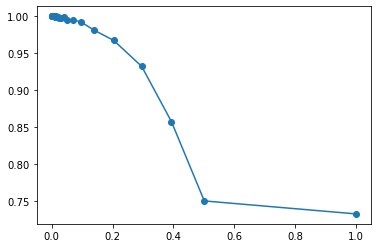

In [15]:
unc = []
for i in range(25):
    unc.append(np.percentile(nstd, i*4+4))
certainty = []
preds = []

for i in range(len(unc)-1):
    whichones = (nstd>unc[i])*(nstd<unc[i+1])
    lab = test_labels[whichones]
    pred = nn[whichones]>0.5
    certainty.append(np.mean(lab==pred))
    preds.append(nn[whichones])

plt.plot(unc[1:], certainty, marker = 'o')

### Replace the last layer of the trained CNN with a k nearest neighbour classifier

In [22]:
loaded_net.eval()

trainData = CustomGCDataset(train_images, train_labels)
train_loader = torch.utils.data.DataLoader(trainData, batch_size=BATCHSIZE, shuffle=False)

# map training data to latent space of CNN
new_train = []
for x,y in train_loader:
    _, xout = loaded_net(x.cuda())
    xout = xout.cpu().detach().numpy()
    new_train += list(xout)
    
# map test data to latent space of CNN
new_test = []
for x,y in test_loader:
    _, xout = loaded_net(x.cuda())
    xout = xout.cpu().detach().numpy()
    new_test += list(xout)

/home/dodo/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [23]:
# train kNN on the latent training data
knn = KNeighborsClassifier(1)
knn.fit(new_train, np.array(train_labels >= 0.5, dtype=int))

# apply kNN on test latent representations for classification
pred = knn.predict(new_test)
probs = knn.predict_proba(new_test)[:,1]

# get evaluation metrics
stats_gal, stats_all, _, _, _, _, _ = get_test_metrics(list(galaxies_to_test), test_galaxies, test_IDs, test_labels, pred, probs=probs, thresh=thresh)

/home/dodo/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dodo/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [24]:
stats_gal.mean()

/tmp/ipykernel_485/1394020141.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stats_gal.mean()


TPR               0.835398
FDR               0.202840
FPR               0.025866
AUC(FDR,TPR)      0.803851
AUC(FPR,TPR)      0.904766
# found GCs     112.577320
# total GCs     127.680412
# fake GCs       11.670103
# sources       645.164948
dtype: float64

In [25]:
stats_all

,Galaxy,TPR,FDR,FPR,"AUC(FDR,TPR)","AUC(FPR,TPR)",# found GCs,# total GCs,# fake GCs,# sources
0,ALL,0.881712,0.093926,0.022552,0.882305,0.92958,10920,12385,1132,62581


#### Repeat the same for higher number of neighbours k

In [26]:
knn = KNeighborsClassifier(12)
knn.fit(new_train, np.array(train_labels >= 0.5, dtype=int))
pred = knn.predict(new_test)
probs = knn.predict_proba(new_test)[:,1]
stats_gal, stats_all, _, _, _, _, _ = get_test_metrics(list(galaxies_to_test), test_galaxies, test_IDs, test_labels, pred, probs=probs, thresh=thresh)

/home/dodo/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dodo/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [27]:
stats_gal.mean()

/tmp/ipykernel_485/1394020141.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stats_gal.mean()


TPR               0.862170
FDR               0.146600
FPR               0.017789
AUC(FDR,TPR)      0.905935
AUC(FPR,TPR)      0.978925
# found GCs     115.865979
# total GCs     127.680412
# fake GCs        7.938144
# sources       645.164948
dtype: float64

In [28]:
stats_all

,Galaxy,TPR,FDR,FPR,"AUC(FDR,TPR)","AUC(FPR,TPR)",# found GCs,# total GCs,# fake GCs,# sources
0,ALL,0.907469,0.064119,0.01534,0.963247,0.985514,11239,12385,770,62581
